In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [ ]:
#!wget --no-check-certificate \
#    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
#    -O /tmp/irish-lyrics-eof.txt

#from google.colab import files
#uploaded = files.upload()

!wget --no-check-certificate \
    https://drive.google.com/file/d/1RdDfuWmiT7OdVmmHhbmO6EavhnRB-4WF/view?usp=sharing \
    -O /tmp/essaynew.txt

# Mordern Essay - John Macy
#!wget --show-progress --continue -O /content/modernessay.txt https://www.gutenberg.org/files/38280/38280-0.txt

--2020-10-03 05:08:33--  https://drive.google.com/file/d/1RdDfuWmiT7OdVmmHhbmO6EavhnRB-4WF/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.68.102, 74.125.68.138, 74.125.68.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.68.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/tmp/essaynew.txt’

/tmp/essaynew.txt       [ <=>                ]  61.84K  --.-KB/s    in 0.1s    

2020-10-03 05:08:33 (422 KB/s) - ‘/tmp/essaynew.txt’ saved [63324]



In [ ]:
tokenizer = Tokenizer()

#data = open('/tmp/irish-lyrics-eof.txt').read()
#data = open('/tmp/paradiselost.txt').read()
#data = open('/content/modernessay.txt').read()
data = open('/content/essay10.txt').read()
#print(data)
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

#print(tokenizer.word_index)
print(total_words)


2685


In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index['in'])


8


In [ ]:
#print(xs[6])

In [ ]:
#print(ys[6])

In [ ]:
#print(xs[5])
#print(ys[5])

In [ ]:
#print(tokenizer.word_index)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=30, verbose=1)
#print model.summary()
print(model)


Epoch 1/30
340/340 [==============================] - 21s 61ms/step - loss: 6.6065 - accuracy: 0.0620
Epoch 2/30
340/340 [==============================] - 21s 61ms/step - loss: 5.6621 - accuracy: 0.1157
Epoch 3/30
340/340 [==============================] - 21s 61ms/step - loss: 4.6865 - accuracy: 0.1696
Epoch 4/30
340/340 [==============================] - 21s 60ms/step - loss: 3.6762 - accuracy: 0.2625
Epoch 5/30
340/340 [==============================] - 21s 60ms/step - loss: 2.8181 - accuracy: 0.3784
Epoch 6/30
340/340 [==============================] - 21s 60ms/step - loss: 2.0912 - accuracy: 0.5058
Epoch 7/30
340/340 [==============================] - 21s 60ms/step - loss: 1.6297 - accuracy: 0.5911
Epoch 8/30
340/340 [==============================] - 20s 60ms/step - loss: 1.2996 - accuracy: 0.6658
Epoch 9/30
340/340 [==============================] - 20s 60ms/step - loss: 1.0657 - accuracy: 0.7217
Epoch 10/30
340/340 [==============================] - 20s 60ms/step - loss: 0.928

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

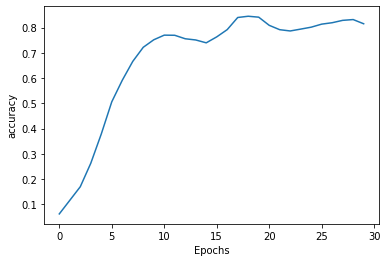

In [ ]:
plot_graphs(history, 'accuracy')


In [ ]:
#seed_text = "Beautiful blue sky"
#seed_text = "Life is a challange"
#seed_text = "Curiosity is awesome"
#seed_text = "I like computer science"
seed_text = "Life is fun"

next_words = 42
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print("---------------------")	
print(seed_text)

---------------------
Life is fun but i want to complain to myself how she’s not bothered to solve my issues without thinking how she’s at least giving time to listen to what i have to find validity in everyone’s viewpoints to at least listen to their reasoning
